In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories= ['alt.atheism','comp.graphics','comp.os.ms-windows.misc',
             'comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
             'comp.windows.x','misc.forsale','rec.autos',
             'rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt',
             'sci.electronics','sci.med','sci.space',
             'soc.religion.christian','talk.politics.guns','talk.politics.mideast',
             'talk.politics.misc','talk.religion.misc']
#training the data
train = fetch_20newsgroups(subset='train' , categories=categories)
#testing the data
test= fetch_20newsgroups(subset='test' , categories=categories)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [4]:
#creating the model
model= make_pipeline(TfidfVectorizer(), MultinomialNB())

In [5]:
#traning the model
model.fit(train.data, train.target)
#labels for the test data
labels= model.predict(test.data)


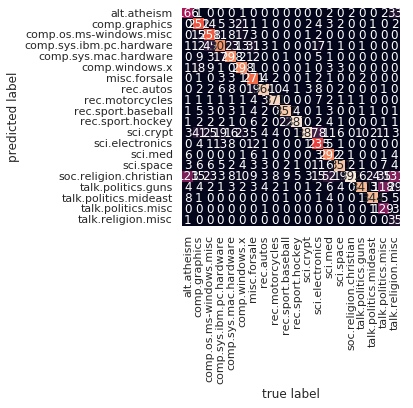

In [6]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
mat_dp= confusion_matrix(test.target, labels)
sns.heatmap(mat_dp.T, square=True, annot=True, fmt='d', cbar =False
            , xticklabels=train.target_names
            , yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [8]:
#predicting a new data
def predict_category(s, train=train, model=model):
    pred= model.predict([s])
    return train.target_names[pred[0]]

In [9]:
predict_category('God is real')

'soc.religion.christian'

In [16]:
predict_category('Apple launches iphone')

'comp.sys.mac.hardware'

In [17]:
predict_category('Microsoft Azure is the future')

'comp.os.ms-windows.misc'